In [1]:
import numpy as np
from math import sqrt

def cubic_interp1d(x0, x, y):
    x = np.asfarray(x)
    y = np.asfarray(y)

    # check if sorted
    if np.any(np.diff(x) < 0):
        indexes = np.argsort(x)
        x = x[indexes]
        y = y[indexes]

    size = len(x)

    xdiff = np.diff(x)
    ydiff = np.diff(y)

    # allocate buffer matrices
    Li = np.empty(size)
    Li_1 = np.empty(size-1)
    z = np.empty(size)

    # fill diagonals Li and Li-1 and solve [L][y] = [B]
    Li[0] = sqrt(2*xdiff[0])
    Li_1[0] = 0.0
    B0 = 0.0 # natural boundary
    z[0] = B0 / Li[0]

    for i in range(1, size-1, 1):
        Li_1[i] = xdiff[i-1] / Li[i-1]
        Li[i] = sqrt(2*(xdiff[i-1]+xdiff[i]) - Li_1[i-1] * Li_1[i-1])
        Bi = 6*(ydiff[i]/xdiff[i] - ydiff[i-1]/xdiff[i-1])
        z[i] = (Bi - Li_1[i-1]*z[i-1])/Li[i]

    i = size - 1
    Li_1[i-1] = xdiff[-1] / Li[i-1]
    Li[i] = sqrt(2*xdiff[-1] - Li_1[i-1] * Li_1[i-1])
    Bi = 0.0 # natural boundary
    z[i] = (Bi - Li_1[i-1]*z[i-1])/Li[i]

    # solve [L.T][x] = [y]
    i = size-1
    z[i] = z[i] / Li[i]
    for i in range(size-2, -1, -1):
        z[i] = (z[i] - Li_1[i-1]*z[i+1])/Li[i]

    # find index
    index = x.searchsorted(x0)
    np.clip(index, 1, size-1, index)

    xi1, xi0 = x[index], x[index-1]
    yi1, yi0 = y[index], y[index-1]
    zi1, zi0 = z[index], z[index-1]
    hi1 = xi1 - xi0

    # calculate cubic
    f0 = zi0/(6*hi1)*(xi1-x0)**3 + \
         zi1/(6*hi1)*(x0-xi0)**3 + \
         (yi1/hi1 - zi1*hi1/6)*(x0-xi0) + \
         (yi0/hi1 - zi0*hi1/6)*(xi1-x0)
    return f0

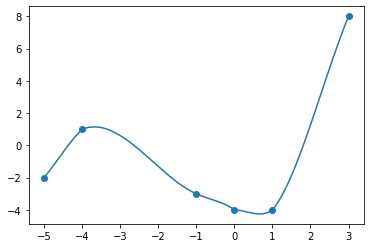

In [6]:
#9  1/11 интерполяция таблицы кубическими сплайнами (с-spline).
#        Вычислить значение сплайна в середине каждого отрезка,
#        нарисовать график
#      x=     -5.0    -4.0    -1.0     0.0     1.0     3.0 
#      y=       -2       1      -3      -4      -4       8 

import matplotlib.pyplot as plt
x = np.array([-5.0,-4.0,-1.0,0.0,1.0,3.0])
y = np.array([-2.0,1,-3,-4,-4,8])
plt.scatter(x, y)

x_new = np.linspace(-5, 3, 201)
plt.plot(x_new, cubic_interp1d(x_new, x, y))

plt.show()

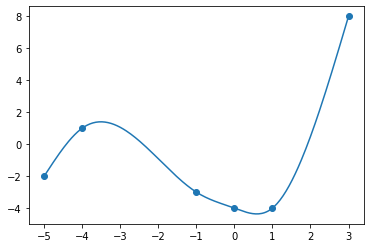

In [7]:
# Проверка
from scipy.interpolate import CubicSpline
cs = CubicSpline(x,y,bc_type='natural')
plt.scatter(x, y)

x_new = np.linspace(-5, 3, 201)
plt.plot(x_new, cs(x_new))

plt.show()